In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import statsmodels.api as sm
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt



In [2]:
file_prhist = 'C:/Users/Windows10/Documents/GitHub/NCfilesmetro/GCMfromstations/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
file_tashist = 'C:/Users/Windows10/Documents/GitHub/NCfilesmetro/GCMfromstations/tas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
file_tasmaxhist = 'C:/Users/Windows10/Documents/GitHub/NCfilesmetro/GCMfromstations/tasmax_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
file_tasminhist = 'C:/Users/Windows10/Documents/GitHub/NCfilesmetro/GCMfromstations/tasmin_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'



In [3]:
ds_prhist = xr.open_dataset(file_prhist)
ds_tashist = xr.open_dataset(file_tashist)
ds_tasmaxhist = xr.open_dataset(file_tasmaxhist)
ds_tasminhist = xr.open_dataset(file_tasminhist)


In [4]:
(
    print(ds_prhist.data_vars),
    print(ds_tashist.data_vars),
    print(ds_tasmaxhist.data_vars),
    print(ds_tasminhist.data_vars)
)

Data variables:
    time_bnds  (time, bnds) datetime64[ns] 32kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    pr         (time, lat, lon) float32 219MB ...
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 32kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 219MB ...
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 32kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tasmax     (time, lat, lon) float32 219MB ...
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 32kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tasmin     (time, lat, lon) float32 219MB ...


(None, None, None, None)

In [5]:
ds_prhist

<xarray.Dataset> Size: 219MB
Dimensions:    (time: 1980, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-16T...
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 32kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    pr         (time, lat, lon) float32 219MB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-11-08T08:26:37Z
    ...                     ...
    variable_id:            pr
    variant_label:          r1i1p1f1
    version:                v20191108
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/b4dd0f13-6073-4d10-b4e6-7d7a4401e37d
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [6]:
import dask
import dask.dataframe as dd


C:\Users\Windows10\anaconda3\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [7]:
ds_prhist = ds_prhist.chunk({'time': 100})  # Chunk by time dimension
ds_prhist_df = ds_prhist['pr'].to_dataframe().reset_index()

ds_tashist = ds_tashist.chunk({'time': 100})
ds_tashist_df = ds_tashist['tas'].to_dataframe().reset_index()

ds_tasmaxhist = ds_tasmaxhist.chunk({'time': 100})
ds_tasmaxhist_df = ds_tasmaxhist['tasmax'].to_dataframe().reset_index()

ds_tasminhist = ds_tasminhist.chunk({'time': 100})
ds_tasminhist_df = ds_tasminhist['tasmin'].to_dataframe().reset_index()

In [8]:
def optimize_memory(df):
    df['time'] = pd.to_datetime(df['time'])
    for col in df.select_dtypes(include=['float']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    return df

ds_prhist_df = optimize_memory(ds_prhist_df)
ds_tashist_df = optimize_memory(ds_tashist_df)
ds_tasmaxhist_df = optimize_memory(ds_tasmaxhist_df)
ds_tasminhist_df = optimize_memory(ds_tasminhist_df)

In [9]:
ds_tashist_df = ds_tashist_df.drop(columns=['height'])
ds_tasmaxhist_df = ds_tasmaxhist_df.drop(columns=['height'])
ds_tasminhist_df = ds_tasminhist_df.drop(columns=['height'])

In [10]:
# check the df that were created
print(ds_prhist_df)
print(ds_tashist_df)
print(ds_tasmaxhist_df)
print(ds_tasminhist_df)

                        time     lat       lon        pr
0        1850-01-16 12:00:00 -89.375    0.9375  0.000003
1        1850-01-16 12:00:00 -89.375    2.8125  0.000002
2        1850-01-16 12:00:00 -89.375    4.6875  0.000002
3        1850-01-16 12:00:00 -89.375    6.5625  0.000002
4        1850-01-16 12:00:00 -89.375    8.4375  0.000002
...                      ...     ...       ...       ...
54743035 2014-12-16 12:00:00  89.375  351.5625  0.000004
54743036 2014-12-16 12:00:00  89.375  353.4375  0.000004
54743037 2014-12-16 12:00:00  89.375  355.3125  0.000004
54743038 2014-12-16 12:00:00  89.375  357.1875  0.000004
54743039 2014-12-16 12:00:00  89.375  359.0625  0.000004

[54743040 rows x 4 columns]
                        time     lat       lon         tas
0        1850-01-16 12:00:00 -89.375    0.9375  252.684326
1        1850-01-16 12:00:00 -89.375    2.8125  252.653320
2        1850-01-16 12:00:00 -89.375    4.6875  252.612793
3        1850-01-16 12:00:00 -89.375    6.5625  252

In [11]:
def merge_dataframes(dfs, on_columns):
    merged_df = dfs[0]
    for df in dfs[1:]:
        merged_df = pd.merge(merged_df, df, on=on_columns, how='inner')
    return merged_df

# List of DataFrames to merge
dataframes = [ds_prhist_df, ds_tashist_df, ds_tasmaxhist_df, ds_tasminhist_df]

# Correctly pass the parameter name 'on_columns'
merged_df = merge_dataframes(dataframes, on_columns=['time', 'lat', 'lon'])

In [12]:
merged_df.isnull().sum() #cleaned data

time      0
lat       0
lon       0
pr        0
tas       0
tasmax    0
tasmin    0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [14]:
merged_df

,time,lat,lon,pr,tas,tasmax,tasmin
0,1850-01-16 12:00:00,-89.375,0.9375,0.000003,252.684326,253.631134,251.654175
1,1850-01-16 12:00:00,-89.375,2.8125,0.000002,252.653320,253.584991,251.611328
2,1850-01-16 12:00:00,-89.375,4.6875,0.000002,252.612793,253.563965,251.564606
3,1850-01-16 12:00:00,-89.375,6.5625,0.000002,252.603760,253.545990,251.545807
4,1850-01-16 12:00:00,-89.375,8.4375,0.000002,252.584961,253.539780,251.542648
...,...,...,...,...,...,...,...
54743035,2014-12-16 12:00:00,89.375,351.5625,0.000004,240.812256,243.706772,237.623932
54743036,2014-12-16 12:00:00,89.375,353.4375,0.000004,240.815674,243.643356,237.621887
54743037,2014-12-16 12:00:00,89.375,355.3125,0.000004,240.784912,243.617371,237.600327
54743038,2014-12-16 12:00:00,89.375,357.1875,0.000004,240.790771,243.611511,237.623184


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54743040 entries, 0 to 54743039
Data columns (total 7 columns):
 #   Column  Dtype         
---  ------  -----         
 0   time    datetime64[ns]
 1   lat     float32       
 2   lon     float32       
 3   pr      float32       
 4   tas     float32       
 5   tasmax  float32       
 6   tasmin  float32       
dtypes: datetime64[ns](1), float32(6)
memory usage: 1.6 GB


In [17]:
region_df = merged_df[(merged_df['lat'] >= 40) & (merged_df['lat'] <= 45) &
                      (merged_df['lon'] >= 10) & (merged_df['lon'] <= 20)]

In [18]:
region_df

,time,lat,lon,pr,tas,tasmax,tasmin
19973,1850-01-16 12:00:00,40.625,10.3125,0.000028,284.325684,285.406860,283.168030
19974,1850-01-16 12:00:00,40.625,12.1875,0.000055,285.713135,286.700775,284.861755
19975,1850-01-16 12:00:00,40.625,14.0625,0.000127,283.765381,284.716736,282.863312
19976,1850-01-16 12:00:00,40.625,15.9375,0.000028,282.036133,283.862518,280.324951
19977,1850-01-16 12:00:00,40.625,17.8125,0.000034,283.738525,284.875122,282.710022
...,...,...,...,...,...,...,...
54735942,2014-12-16 12:00:00,44.375,12.1875,0.000019,281.016602,281.936829,280.075653
54735943,2014-12-16 12:00:00,44.375,14.0625,0.000042,282.266113,283.442200,281.294159
54735944,2014-12-16 12:00:00,44.375,15.9375,0.000063,279.036621,280.713043,277.423737
54735945,2014-12-16 12:00:00,44.375,17.8125,0.000040,271.854492,274.221527,269.507507


In [19]:
region_df.set_index('time', inplace=True)
monthly_df = region_df.resample('ME').mean()

# Check the resampled data
monthly_df.head()

,lat,lon,pr,tas,tasmax,tasmin
time,,,,,,
1850-01-31,42.5,15.0,0.000067,280.603973,282.003998,279.208649
1850-02-28,42.5,15.0,0.000043,280.844574,282.414459,279.459290
1850-03-31,42.5,15.0,0.000023,282.165619,284.217865,280.311584
1850-04-30,42.5,15.0,0.000019,284.627411,286.692841,282.557098
1850-05-31,42.5,15.0,0.000010,289.186554,291.691620,286.040680


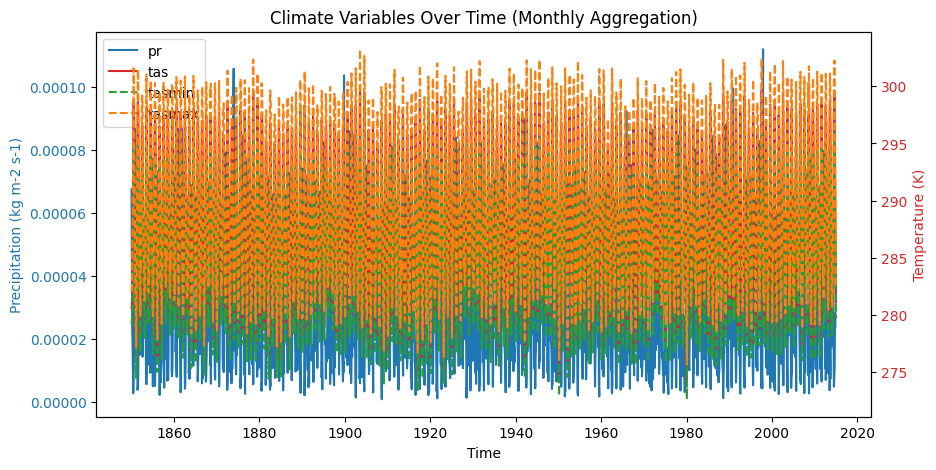

In [20]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot precipitation on the primary y-axis
ax1.set_xlabel('Time')
ax1.set_ylabel('Precipitation (kg m-2 s-1)', color='tab:blue')
ax1.plot(monthly_df.index, monthly_df['pr'], color='tab:blue', label='pr')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for temperature data
ax2 = ax1.twinx()  
ax2.set_ylabel('Temperature (K)', color='tab:red')
ax2.plot(monthly_df.index, monthly_df['tas'], color='tab:red', label='tas')
ax2.plot(monthly_df.index, monthly_df['tasmin'], color='tab:green', linestyle='--', label='tasmin')
ax2.plot(monthly_df.index, monthly_df['tasmax'], color='tab:orange', linestyle='--', label='tasmax')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title
plt.title('Climate Variables Over Time (Monthly Aggregation)')

# Combine the legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()


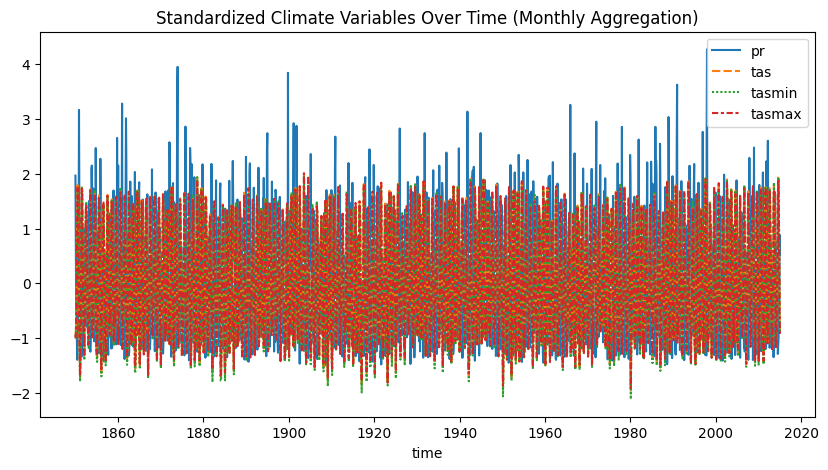

In [21]:
# Standardizing the data in one axis 
from sklearn.preprocessing import StandardScaler
columns_to_standardize = ['pr', 'tas', 'tasmin', 'tasmax']
scaler = StandardScaler()
# Apply the scaler 
monthly_df[columns_to_standardize] = scaler.fit_transform(monthly_df[columns_to_standardize])
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_df[columns_to_standardize])
plt.title('Standardized Climate Variables Over Time (Monthly Aggregation)')
plt.show()



In [22]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')

# Test stationarity for 'tas' as an example
test_stationarity(monthly_df['tas'])

ADF Statistic: -5.699600374102583
p-value: 7.730671721882456e-07
Critical Value 1%: -3.4337027474693436
Critical Value 5%: -2.8630210437503014
Critical Value 10%: -2.5675584476702773


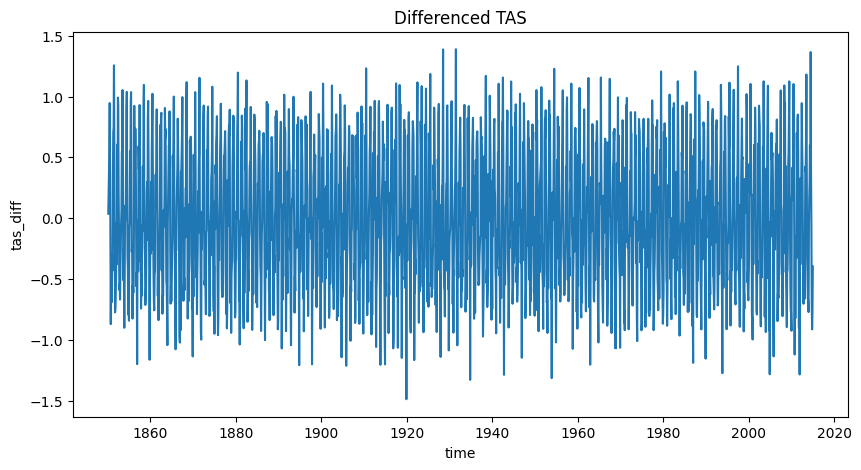

ADF Statistic: -14.426444559504759
p-value: 7.757842633278474e-27
Critical Value 1%: -3.4337027474693436
Critical Value 5%: -2.8630210437503014
Critical Value 10%: -2.5675584476702773


In [23]:
monthly_df['tas_diff'] = monthly_df['tas'].diff()

# Plot differenced series
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_df['tas_diff'])
plt.title('Differenced TAS')
plt.show()

# Test stationarity again
test_stationarity(monthly_df['tas_diff'])